# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** \<Stanisław Nóżka>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
from mpl_toolkits.mplot3d import Axes3D
%load_ext memory_profiler

---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [2]:
solution, times, memory = [], [], []

A, b = main.spare_matrix_Abt(50, 12)
A_new, b_new = main.square_from_rectan(A, b)

# --- 1 ---
start = time.perf_counter()
mem = memory_usage((np.linalg.solve, (A_new, b_new)), max_usage=True)
solution.append(np.linalg.solve(A_new, b_new))
times.append(time.perf_counter() - start)
memory.append(mem)

# --- 2 ---
start = time.perf_counter()
mem = memory_usage((np.linalg.lstsq, (A_new, b_new), {'rcond': None}), max_usage=True)
solution.append(np.linalg.lstsq(A_new, b_new, rcond=None)[0])
times.append(time.perf_counter() - start)
memory.append(mem)

# --- 3 ---
start = time.perf_counter()
Q, R = np.linalg.qr(A_new)
y = Q.T @ b_new
mem = memory_usage((sp.linalg.solve_triangular, (R, y)), max_usage=True)
solution.append(sp.linalg.solve_triangular(R, y))
times.append(time.perf_counter() - start)
memory.append(mem)

# --- 4 ---
start = time.perf_counter()
U, S, VT = np.linalg.svd(A_new, full_matrices=False)
mem = memory_usage((np.linalg.svd, (A_new,), {'full_matrices': False}), max_usage=True)
solution.append(VT.T @ (np.linalg.inv(np.diag(S)) @ (U.T @ b_new)))
times.append(time.perf_counter() - start)
memory.append(mem)

norm = [None]*4
for i in range(4):
    norm[i] = np.linalg.norm(A_new @ solution[i] - b_new)


In [3]:
# Przykładowa forma zestawienia wyników
print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(times[0])[:29]}")
print(f"Druga metoda    :  {str(times[1])[:29]}")
print(f"Trzecia metoda  :  {str(times[2])[:29]}")
print(f"Czwarta metoda  :  {str(times[3])[:29]}")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(memory[0])}")
print(f"Druga metoda    :  {str(memory[1])}")
print(f"Trzecia metoda  :  {str(memory[2])}")
print(f"Czwarta metoda  :  {str(memory[3])}")

Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  4.727e-14
Druga metoda    :  3.537e-14
Trzecia metoda  :  5.997e-14
Czwarta metoda  :  5.404e-14

Czas wykonywania dla kolejnych metod obliczeń:
Pierwsza metoda :  2.9133523999998943
Druga metoda    :  2.5399090000000797
Trzecia metoda  :  3.705525100000159
Czwarta metoda  :  2.343783799999983

Użyta pamięć dla kolejnych metod obliczeń:
Pierwsza metoda :  119.40234375
Druga metoda    :  119.59765625
Trzecia metoda  :  135.5078125
Czwarta metoda  :  135.5546875


---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


Równanie regresji: w = 0.786 * d + -3.504
Norma residuum (błąd dopasowania): 5.835e+01


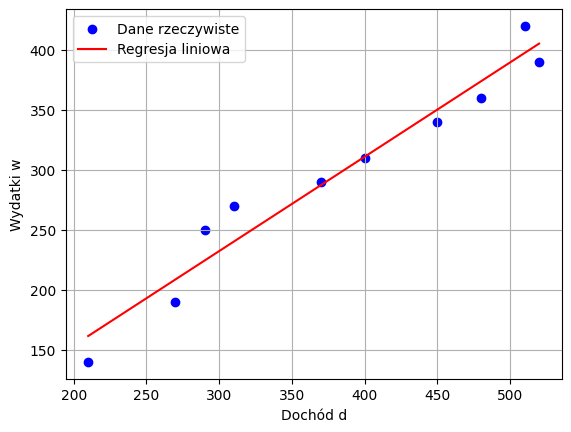

In [4]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

A = np.vstack([d, np.ones(len(d))]).T
a, b = np.linalg.lstsq(A, w, rcond=None)[0]

print(f"Równanie regresji: w = {a:.3f} * d + {b:.3f}")

# Wartości przewidywane i błąd
w_pred = a * d + b
residuum = np.linalg.norm(w - w_pred)
print(f"Norma residuum (błąd dopasowania): {residuum:.3e}")

# Wizualizacja
plt.scatter(d, w, label='Dane rzeczywiste', color='blue')
plt.plot(d, w_pred, label='Regresja liniowa', color='red')
plt.xlabel("Dochód d")
plt.ylabel("Wydatki w")
plt.legend()
plt.grid(True)
plt.show()

---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.


Model 1: a + x1
Macierz Z: shape = (100, 2)
Przykładowe kolumny Z (pierwsze 3 wiersze):
[[ 1.          0.09312278]
 [ 1.         -0.36453657]
 [ 1.         -0.52437508]]
Wektor b (współczynniki): shape = (2, 1)
  b[0] = 2.053298
  b[1] = 1.102663
Norma residuum ||y-ŷ|| = 1.119388e+01
RSS = 1.253030e+02, R2 = 0.534470

Model 2: a + x2
Macierz Z: shape = (100, 2)
Przykładowe kolumny Z (pierwsze 3 wiersze):
[[ 1.         -0.63323911]
 [ 1.          1.59906084]
 [ 1.         -0.76047692]]
Wektor b (współczynniki): shape = (2, 1)
  b[0] = 2.100905
  b[1] = -0.441859
Norma residuum ||y-ŷ|| = 1.573733e+01
RSS = 2.476635e+02, R2 = 0.079872

Model 3: a + x1 + x2
Macierz Z: shape = (100, 3)
Przykładowe kolumny Z (pierwsze 3 wiersze):
[[ 1.          0.09312278 -0.63323911]
 [ 1.         -0.36453657  1.59906084]
 [ 1.         -0.52437508 -0.76047692]]
Wektor b (współczynniki): shape = (3, 1)
  b[0] = 2.094713
  b[1] = 1.094922
  b[2] = -0.420187
Norma residuum ||y-ŷ|| = 1.028925e+01
RSS = 1.05868

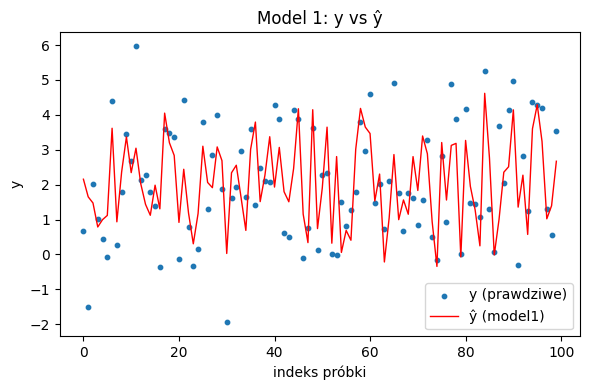

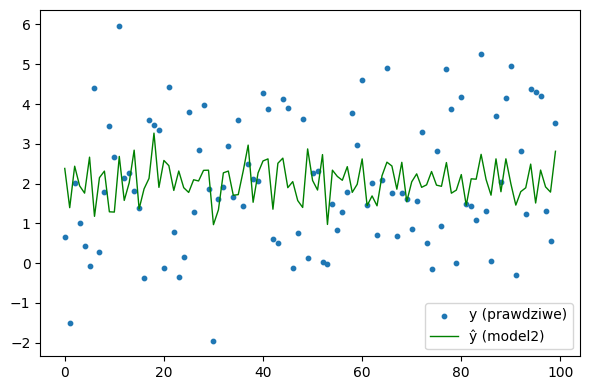

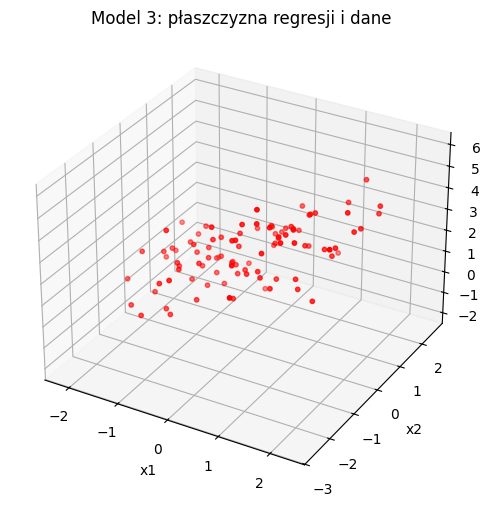

In [ ]:

n = 100

x1 = np.random.normal(loc=0.0, scale=1.0, size=(n,1))
x2 = np.random.normal(loc=0.0, scale=1.0, size=(n,1))
eps = np.random.normal(loc=0.0, scale=1.0, size=(n,1))

y = 2.0 + x1 - 0.5 * x2 + eps 

def solve_via_qr(Z, y):
    Q, R = np.linalg.qr(Z, mode='reduced') 
    rhs = Q.T @ y                  
    b = sp.linalg.solve_triangular(R, rhs) 
    return b, Q, R


def metrics(Z, b, y):
    y_hat = Z @ b
    resid = y - y_hat
    norm_resid = np.linalg.norm(resid)
    RSS = float((resid**2).sum())
    TSS = float(((y - y.mean())**2).sum())
    R2 = 1.0 - RSS / TSS
    return {'y_hat': y_hat, 'norm_resid': norm_resid, 'RSS': RSS, 'TSS': TSS, 'R2': R2}


models = {}

# Model 1: y ~ a + x1
# równanie analityczne: y = b0*1 + b1 * x1
Z1 = np.concatenate([np.ones((n,1)), x1], axis=1)
models['model1'] = ('a + x1', Z1)

# Model 2: y ~ a + x2
# y = b0*1 + b1 * x2
Z2 = np.concatenate([np.ones((n,1)), x2], axis=1)  
models['model2'] = ('a + x2', Z2)

# Model 3: y ~ a + x1 + x2
# y = b0*1 + b1 * x1 + b2 * x2
Z3 = np.concatenate([np.ones((n,1)), x1, x2], axis=1)
models['model3'] = ('a + x1 + x2', Z3)

# Model 4: y ~ a + x1 + x2 + x1*x2
# y = b0*1 + b1*x1 + b2*x2 + b3*(x1*x2)
x1x2 = x1 * x2
Z4 = np.concatenate([np.ones((n,1)), x1, x2, x1x2], axis=1) 
models['model4'] = ('a + x1 + x2 + x1x2', Z4)


results = {}
for key, (descr, Z) in models.items():
    b_vec, Q, R = solve_via_qr(Z, y)     
    met = metrics(Z, b_vec, y)
    results[key] = {
        'descr': descr,
        'Z': Z,
        'b': b_vec,
        'Q': Q,
        'R': R,
        'metrics': met,
        'Z_shape': Z.shape,
        'b_shape': b_vec.shape,
        'y_shape': y.shape
    }


for i, key in enumerate(['model1','model2','model3','model4'], start=1):
    res = results[key]
    print(f"\nModel {i}: {res['descr']}")
    print(f"Macierz Z: shape = {res['Z_shape']}")
    print("Przykładowe kolumny Z (pierwsze 3 wiersze):")
    print(res['Z'][:3,:])
    print(f"Wektor b (współczynniki): shape = {res['b_shape']}")
    # wypisz współczynniki
    b_flat = res['b'].flatten()
    for j, bj in enumerate(b_flat):
        print(f"  b[{j}] = {bj:.6f}")
    # metryki
    mets = res['metrics']
    print(f"Norma residuum ||y-ŷ|| = {mets['norm_resid']:.6e}")
    print(f"RSS = {mets['RSS']:.6e}, R2 = {mets['R2']:.6f}")


# 1)
plt.figure(figsize=(6,4))
yhat1 = results['model1']['metrics']['y_hat']
plt.scatter(range(n), y, label='y (prawdziwe)', s=10)
plt.plot(range(n), yhat1, 'r-', label='ŷ (model1)', linewidth=1)
plt.tight_layout()

# 2) Model2
plt.figure(figsize=(6,4))
yhat2 = results['model2']['metrics']['y_hat']
plt.scatter(range(n), y, label='y (prawdziwe)', s=10)
plt.plot(range(n), yhat2, 'g-', label='ŷ (model2)', linewidth=1)
plt.legend()
plt.tight_layout()


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
grid_n = 20
x1_grid = np.linspace(x1.min(), x1.max(), grid_n)
x2_grid = np.linspace(x2.min(), x2.max(), grid_n)
X1g, X2g = np.meshgrid(x1_grid, x2_grid)
b3 = results['model3']['b'].flatten()
Zg = b3[0] + b3[1]*X1g + b3[2]*X2g
ax.plot_wireframe(X1g, X2g, Zg, alpha=0.6, rcount=10, ccount=10)
ax.scatter(x1.flatten(), x2.flatten(), y.flatten(), s=10, c='r', label='dane')
ax.set_xlabel('x1'); ax.set_ylabel('x2'); ax.set_zlabel('y')
ax.set_title('Model 3: płaszczyzna regresji i dane')

plt.show()


---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)